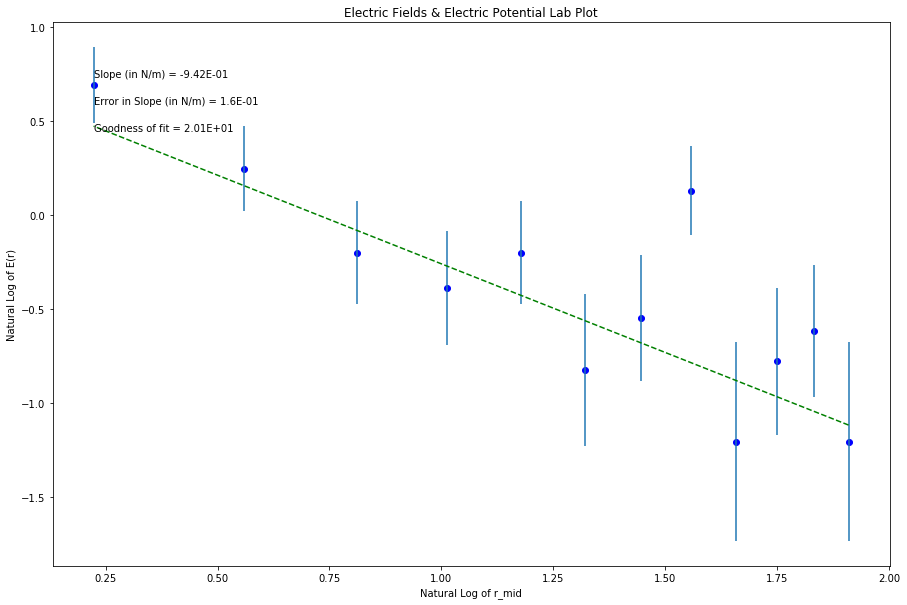

In [2]:
%matplotlib inline
#####################################
#IMPORTS

import numpy as np
import matplotlib.pyplot as plt

#####################################
#FUNCTIONS

def unc_E(E, d_Delta_V, Delta_V, d_Delta_r, Delta_r):
    A = (d_Delta_V/Delta_V)**2
    B = (d_Delta_r/Delta_r)**2
    D=np.sqrt((A+B))
    return E*D

#####################################
#DATA

r = np.array([7,6.5,6,5.5,5,4.5,4,3.5,3,2.5,2,1.5,1])     #in cm
r=r*0.01                                                    #r from cm to m

r_mid = np.array([6.75,6.25,5.75,5.25,4.75,4.25,3.75,3.25,2.75,2.25,1.75,1.25])
Delta_V = np.array([-0.15,-0.27,0.23,-0.15,-0.57,-0.29,-0.22,-0.41,-0.34,-0.41,
                    -0.64,-1.0])

Delta_r=0.005
d_Delta_r=0.001               #in m
d_Delta_V=0.1                 #in V

i=0
E=[]
while i<len(Delta_V):
    E.append(Delta_V[i]/0.5)
    i+=1

E=np.array(E)
E=np.absolute(E)

un_E=unc_E(E, d_Delta_V, Delta_V, d_Delta_r, Delta_r)

ln_E=np.log(E)
ln_r_mid=np.log(r_mid)

sum_E_un_E=np.array(E+un_E)

un_ln_E=np.array(np.log(sum_E_un_E)-np.log(E))


#-----------------------------------------------#
#--------------PLOTTING CODE BELOW--------------#
#-----------------------------------------------#

xvariable = ln_r_mid
yvariable = ln_E
err_yvariable = np.array(un_ln_E)

#--------------------------------------------#

x = xvariable  
y = yvariable
dy = err_yvariable 

#----------------------------------------------#
#Don't need to change anything in this section!
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b,m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept

def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                     
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope,
#error in slope and goodness of fit on the plot using "annotate"

plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
 
#create labels
plt.xlabel('Natural Log of r_mid')
plt.ylabel('Natural Log of E(r)')
plt.title('Electric Fields & Electric Potential Lab Plot')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (in N/m) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope (in N/m) = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()
